In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("/kaggle/input/onlineretail/OnlineRetail.csv", encoding = "unicode-escape")
df["Total Amount"] = df["Quantity"] * df["UnitPrice"] # Total Amount is the total amount of each product (quantity) * unit price
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total Amount
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


## Frequancy Distribution and fitting of normal distribution

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa846b96690>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa846ba6190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa846b96750>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa846ba6850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa846ba6b90>],
 'means': []}

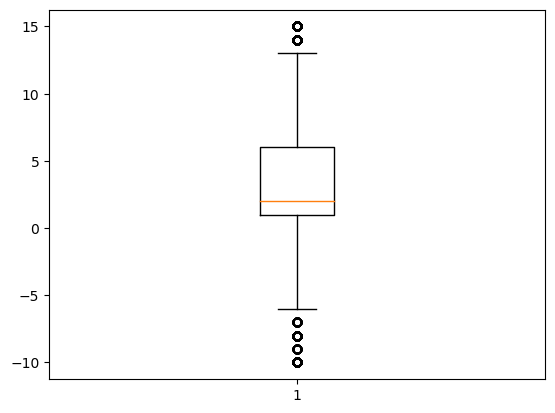

In [4]:
plt.boxplot(df["Quantity"][(df["Quantity"]>=-10)&(df["Quantity"]<=15)])

In [5]:
data = df["Quantity"][(df["Quantity"]>=-9000)&(df["Quantity"]<=7000)]

classes = [i for i in range(-10,15,2)]
hist, bins = np.histogram(data, bins=classes)

freq_table = pd.DataFrame({'Class': [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)],
                           'Frequency': hist})

freq_table

,Class,Frequency
0,-10--9,284
1,-8--7,276
2,-6--5,753
3,-4--3,1122
4,-2--1,5579
5,0-1,148227
6,2-3,118950
7,4-5,50241
8,6-7,43782
9,8-9,15166


In [6]:
stats.mode(freq_table)

ModeResult(mode=array([['-10--9', 276]], dtype=object), count=array([[1, 1]]))

(array([0.00030223, 0.00029372, 0.00080133, 0.00119402, 0.00593711,
        0.15774166, 0.12658538, 0.05346596, 0.04659236, 0.0161395 ,
        0.02473603, 0.0662107 ]),
 array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,  14]),
 <BarContainer object of 12 artists>)

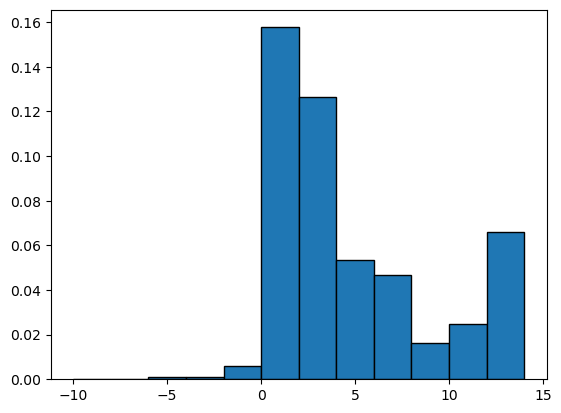

In [7]:
plt.hist(data, bins=classes, density=True, edgecolor="black")

In [8]:
mu, std = stats.norm.fit(data)

# What does the .describe() tells in this case

* There are -ve values in the quantities as well as unit price column
* Mean, Median, Q1,...

# Analysis of Description col

In [9]:
desc = pd.DataFrame(df["Description"].value_counts(dropna=True,ascending=False))
desc.head()

,Description
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638


In [10]:
desc.describe()

,Description
count,4223.000000
mean,127.978925
std,195.034410
min,1.000000
25%,11.000000
50%,57.000000
75%,161.000000
max,2369.000000


<AxesSubplot:>

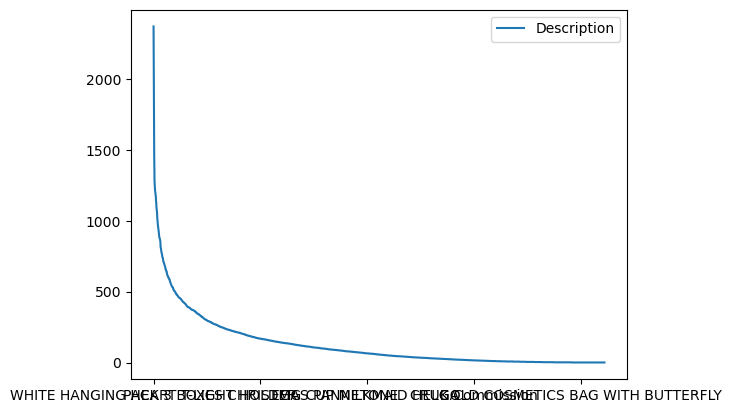

In [11]:
desc.plot()

In [12]:
df_desc = df.groupby("Description")[["Quantity","UnitPrice"]].sum()
df_desc["total_amount"] = df_desc["Quantity"]*df_desc["UnitPrice"]
df_desc = df_desc.sort_values("Quantity")

In [13]:
desc.rename(columns = {"Description":"Count"}, inplace=True)

In [14]:
df_desc = df_desc.join(desc)
df_desc = df_desc[["Count","Quantity","UnitPrice","total_amount"]]
df_desc

,Count,Quantity,UnitPrice,total_amount
Description,,,,
printing smudges/thrown away,2,-19200,0.00,-0.000000e+00
"Unsaleable, destroyed.",9,-15644,0.00,-0.000000e+00
check,159,-12030,0.00,-0.000000e+00
Printing smudges/thrown away,1,-9058,0.00,-0.000000e+00
Damaged,14,-7540,0.00,-0.000000e+00
...,...,...,...,...
PACK OF 72 RETROSPOT CAKE CASES,1385,36039,1047.04,3.773427e+07
POPCORN HOLDER,865,36334,874.50,3.177408e+07
ASSORTED COLOUR BIRD ORNAMENT,1501,36381,2584.77,9.403652e+07


In [15]:
df_desc['total_amount'] = df_desc['total_amount'].astype('int64')
df_desc.sort_values("total_amount")

,Count,Quantity,UnitPrice,total_amount
Description,,,,
AMAZON FEE,34,-30,249042.680,-7471280
Discount,77,-1194,5581.310,-6664084
SAMPLES,63,-59,3175.490,-187353
CRUK Commission,16,-16,7933.430,-126934
Bank Charges,37,-13,7505.641,-97573
...,...,...,...,...
PARTY BUNTING,1727,18022,9979.620,179852711
JUMBO BAG RED RETROSPOT,2159,47363,5333.300,252601087
WHITE HANGING HEART T-LIGHT HOLDER,2369,35317,7590.870,268086755


In [16]:
df_desc["total_amount"].astype("int64").describe()

count    4.223000e+03
mean     1.694207e+06
std      1.479042e+07
min     -7.471280e+06
25%      1.089000e+03
50%      4.227300e+04
75%      3.740885e+05
max      6.787373e+08
Name: total_amount, dtype: float64

<AxesSubplot:xlabel='Description'>

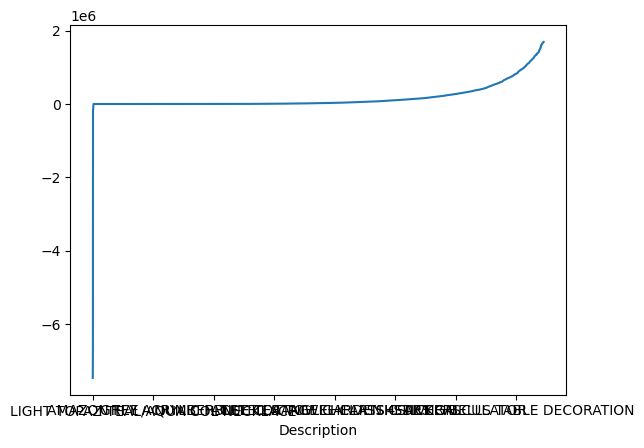

In [17]:
df_desc.sort_values('total_amount')["total_amount"][df_desc["total_amount"]<1.694207e+06].plot()

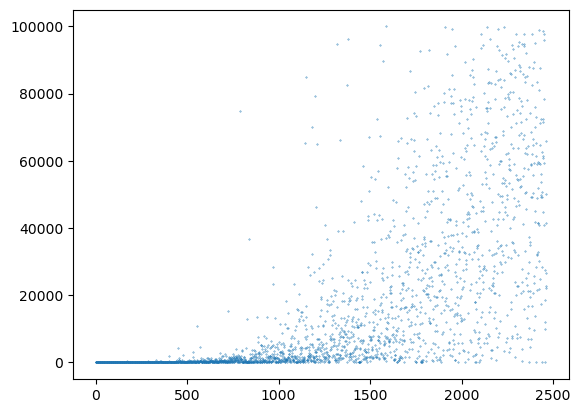

In [18]:
plt.scatter(range(len(df_desc["total_amount"][(df_desc["total_amount"]>=0) & (df_desc["total_amount"]<=100000)])),df_desc["total_amount"][(df_desc["total_amount"]>=0) & (df_desc["total_amount"]<=100000)],s=0.1)

In [19]:
#sns.countplot(x = df['Description'], data = df)

# Plots of each numeric col

Text(0.5, 1.0, 'Quantity')

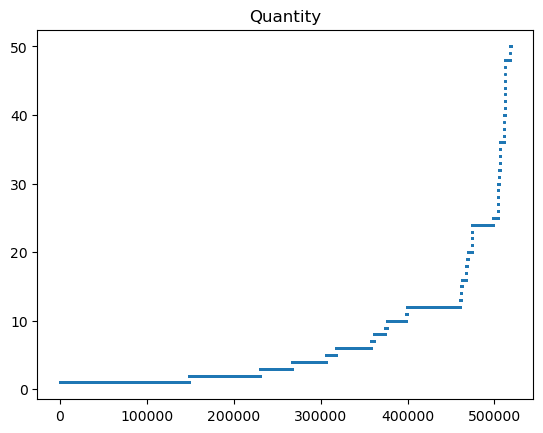

In [20]:
plt.scatter(range(len(df["Quantity"][(df["Quantity"]>=0) & (df["Quantity"]<=50)])),sorted(df["Quantity"][(df["Quantity"]>0) & (df["Quantity"]<=50)]),s=0.2)
plt.title("Quantity")

Text(0.5, 1.0, 'Total Amount')

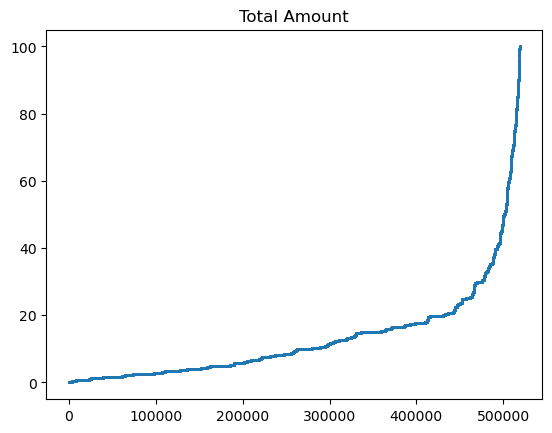

In [21]:
plt.scatter(range(len(df["Total Amount"][(df["Total Amount"]>=0) & (df["Total Amount"]<=100)])),sorted(df["Total Amount"][(df["Total Amount"]>=0) & (df["Total Amount"]<=100)]),s=0.2)
plt.title("Total Amount")

Text(0.5, 1.0, 'UnitPrice')

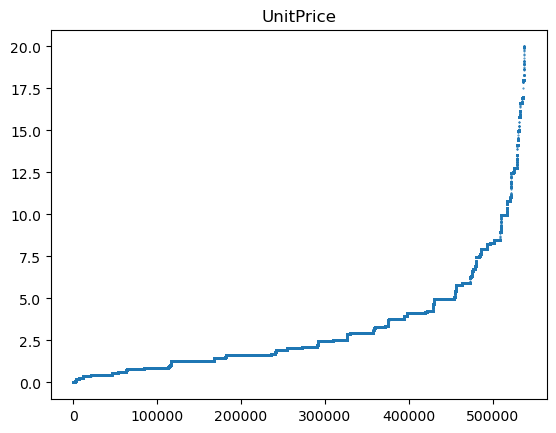

In [22]:
plt.scatter(range(len(df["UnitPrice"][(df["UnitPrice"]>=0) & (df["UnitPrice"]<=20)])),sorted(df["UnitPrice"][(df["UnitPrice"]>=0) & (df["UnitPrice"]<=20)]),s=0.2)
plt.title("UnitPrice")

# Analysis of Quantity Col

In [23]:
df.sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-168469.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.6
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom,-0.0
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom,-0.0
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,-280.8
...,...,...,...,...,...,...,...,...,...
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom,1008.0
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,United Kingdom,0.0
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom,0.0
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6


Following are the extreme values...

## "Paper Craft, Little Birdie" amounting 80,995 was purchased and returned
## "Medium Ceramic Top storage bar" amounting 74,215 was also returned

In [24]:
df[df["Quantity"]<0].sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-168469.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.60
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom,-0.00
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom,-0.00
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,-280.80
...,...,...,...,...,...,...,...,...,...
240697,C558112,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,6/26/2011 16:08,9.95,17114.0,United Kingdom,-9.95
240696,C558112,23091,ZINC HERB GARDEN CONTAINER,-1,6/26/2011 16:08,6.25,17114.0,United Kingdom,-6.25
240694,C558112,82486,WOOD S/3 CABINET ANT WHITE FINISH,-1,6/26/2011 16:08,8.95,17114.0,United Kingdom,-8.95
242447,C558347,S,SAMPLES,-1,6/28/2011 14:47,9.90,NaN,United Kingdom,-9.90


# Grouping Invoices and further analysis

In [25]:
df_invoice = df.groupby("InvoiceNo")[["Quantity","UnitPrice","Total Amount"]].sum()
df_invoice.shape

(25900, 3)

In [26]:
df_invoice.sort_values("Total Amount").head(30)

,Quantity,UnitPrice,Total Amount
InvoiceNo,,,
C581484,-80995,2.08,-168469.60
C541433,-74215,1.04,-77183.60
C556445,-1,38970.00,-38970.00
C550456,-9014,15.80,-22998.40
C580605,-1,17836.46,-17836.46
C540117,-1,16888.02,-16888.02
C540118,-1,16453.71,-16453.71
C537651,-1,13541.33,-13541.33
C537630,-1,13541.33,-13541.33


In [27]:
df_invoice.describe()

,Quantity,UnitPrice,Total Amount
count,25900.000000,25900.000000,25900.000000
mean,199.862934,96.478918,376.360924
std,1108.563551,494.677787,2013.261050
min,-80995.000000,-11062.060000,-168469.600000
25%,6.000000,7.410000,11.775000
50%,100.000000,31.130000,207.535000
75%,240.000000,75.665000,409.085000
max,80995.000000,38970.000000,168469.600000


# Analysis of the df_invoice Frame

* There are 25900 different invoices
* On average the total amount of the bill is $483.49
* 

In [28]:
df_invoice1 = df_invoice[(df_invoice["Quantity"]<=2500) & (df_invoice["Quantity"]>=0) & (df_invoice["Total Amount"]<=2500) & (df_invoice["Total Amount"]>=0)]

In [29]:
df_invoice1.shape

(20186, 3)

In [30]:
df_invoice1.describe()

,Quantity,UnitPrice,Total Amount
count,20186.000000,20186.000000,20186.000000
mean,208.336570,78.509927,372.024067
std,233.037296,147.331967,379.610561
min,1.000000,0.000000,0.000000
25%,61.000000,15.400000,135.000000
50%,141.500000,42.160000,289.245000
75%,272.000000,85.000000,456.885000
max,2460.000000,2500.000000,2500.000000


In [31]:
df_invoice2 = df_invoice1.sample(n=1000).sort_values("Total Amount")
df_invoice2.shape

(1000, 3)

<AxesSubplot:ylabel='InvoiceNo'>

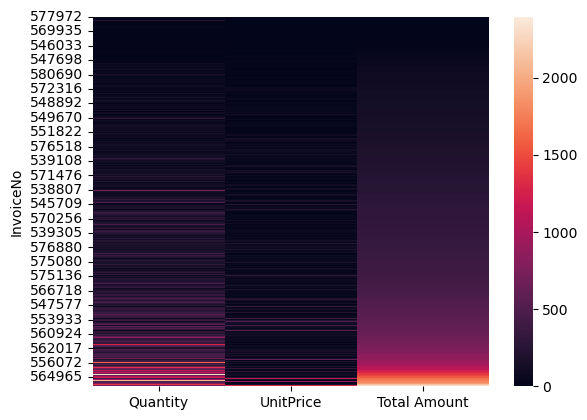

In [32]:
sns.heatmap(data=df_invoice2, cbar=True)

In [33]:
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

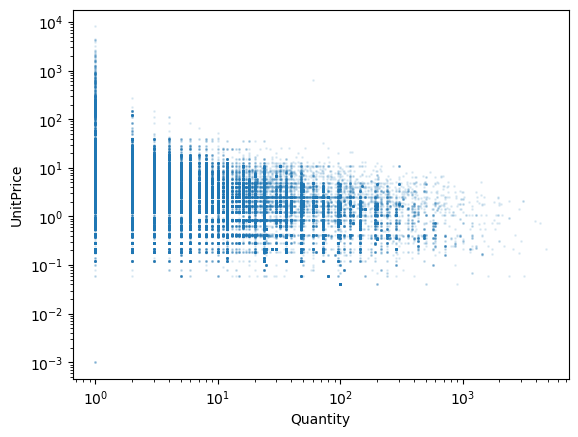

In [34]:
df.query("UnitPrice > 0 & UnitPrice < 10000 & Quantity > 0 & Quantity < 10000").plot(x="Quantity",y="UnitPrice", kind="scatter",loglog=True,alpha=0.1,s=1)

In [35]:
invoice = pd.DataFrame(df["InvoiceNo"].value_counts())
invoice.head()

,InvoiceNo
573585,1114
581219,749
581492,731
580729,721
558475,705


<AxesSubplot:>

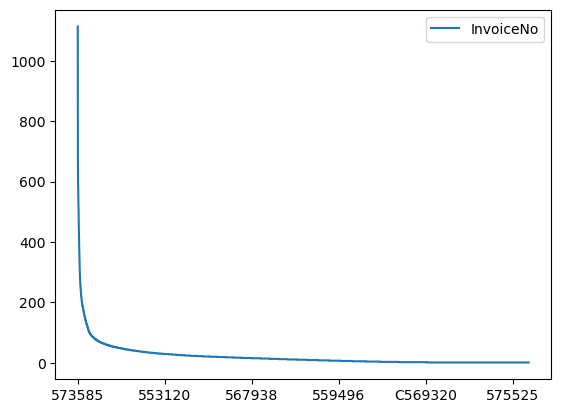

In [36]:
invoice.plot()

In [37]:
invoice.describe()

,InvoiceNo
count,25900.000000
mean,20.923127
std,43.031334
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1114.000000


In [38]:
df.query(" InvoiceNo == 573585 ");

<AxesSubplot:>

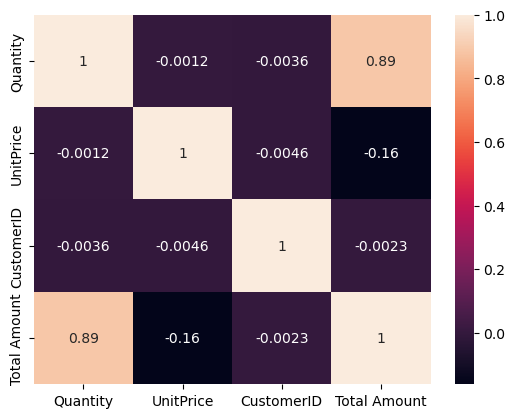

In [39]:
corr = df.corr()
sns.heatmap(data=corr,annot=True)

<AxesSubplot:xlabel='InvoiceNo', ylabel='Count'>

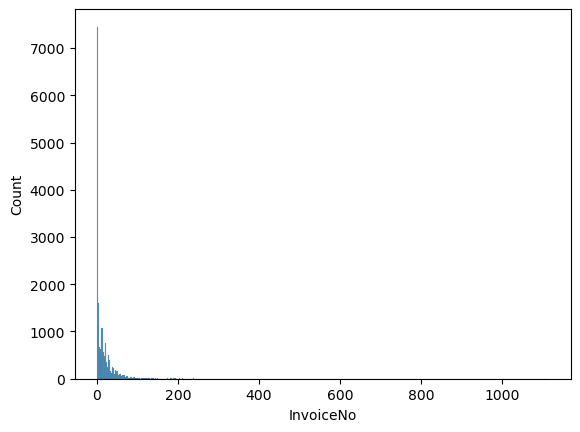

In [40]:
sns.histplot(data=invoice.InvoiceNo)

## Making distribution of Quantity against time

In [41]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format = "%m/%d/%Y %H:%M")

In [42]:
df["Month"] = df["InvoiceDate"].dt.month
df.loc[df["InvoiceDate"].dt.year == 2011, "Month"] += 12
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [43]:
df["one"] = 1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Month,one
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1


In [44]:
month = df.groupby("Month")[["Quantity","one"]].sum()
month = pd.DataFrame(month)
month.reset_index()

,Month,Quantity,one
0,12,342228,42481
1,13,308966,35147
2,14,277989,27707
3,15,351872,36748
4,16,289098,29916
5,17,380391,37030
6,18,341623,36874
7,19,391116,39518
8,20,406199,35284
9,21,549817,50226


In [45]:
q1 = list(month["Quantity"])
q2 = list(month["one"])

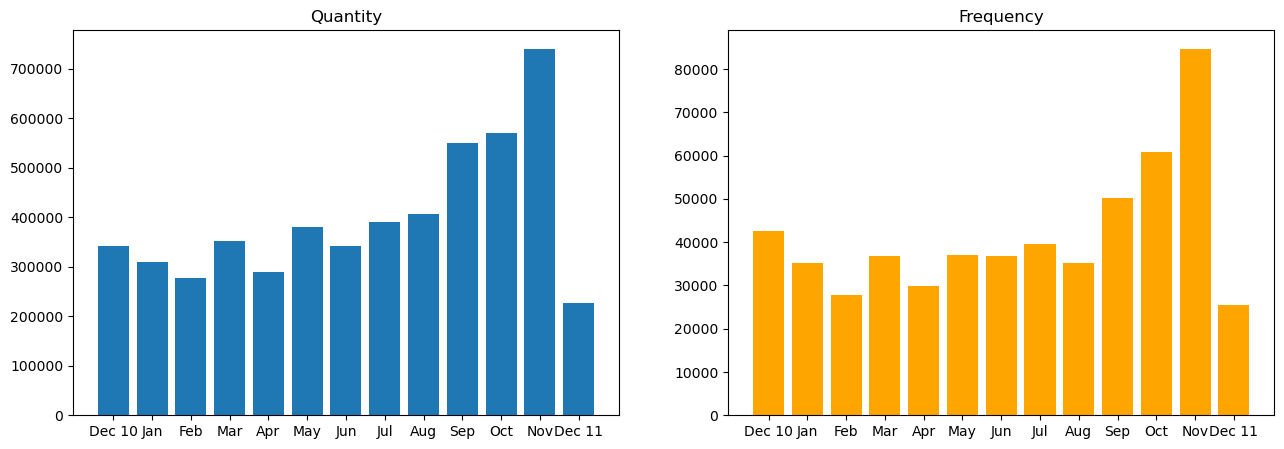

In [46]:
plt.figure(figsize=(15.5,5))
mon=["Dec 10","Jan", "Feb","Mar","Apr", "May","Jun", "Jul","Aug","Sep", "Oct", "Nov","Dec 11"]

plt.subplot(1,2,1)
plt.bar(x=mon, height=q1)
plt.title("Quantity")

plt.subplot(1,2,2)
plt.bar(x=mon, height=q2, color="orange")
plt.title("Frequency")
plt.show()